# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?    
  We need to dummify species, island, and sex

In [1]:
!pip install palmerpenguins

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer

In [3]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins = penguins.dropna()
X = penguins.drop('bill_length_mm', axis = 1)
y = penguins['bill_length_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
## preprocessing: OneHotEncode - dummify
## Model Spec: Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

#column transformer
ct = ColumnTransformer([('dummify', enc, ['species', 'island','sex'])])

#dummify,etc is the name of each step to see where errors come in the future

my_pipeline_lr = Pipeline(
    [('dummify_everything', ct),('ols', lr)]
)

In [6]:
fitted_pipeline_lr = my_pipeline_lr.fit(X_train,y_train)

In [7]:
fitted_pipeline_lr.predict(X_test)

array([37.6237792 , 45.78457466, 37.24440603, 40.78434762, 41.1637208 ,
       41.1637208 , 49.32451625, 37.24440603, 50.67732543, 50.67732543,
       49.32451625, 37.10957466, 37.6237792 , 50.67732543, 37.6237792 ,
       49.32451625, 41.1637208 , 41.1637208 , 49.32451625, 49.32451625,
       45.78457466, 45.78457466, 37.6237792 , 37.24440603, 49.32451625,
       49.32451625, 45.78457466, 41.1637208 , 40.64951625, 49.32451625,
       49.32451625, 37.24440603, 37.10957466, 47.13738384, 40.78434762,
       37.10957466, 37.6237792 , 40.64951625, 50.67732543, 37.24440603,
       40.78434762, 50.67732543, 40.64951625, 40.64951625, 40.78434762,
       50.67732543, 49.32451625, 37.6237792 , 41.1637208 , 40.64951625,
       40.64951625, 45.78457466, 49.32451625, 49.32451625, 45.78457466,
       49.32451625, 50.67732543, 45.78457466, 47.13738384, 37.6237792 ,
       40.78434762, 47.13738384, 47.13738384, 37.24440603, 45.78457466,
       37.6237792 , 50.67732543, 45.78457466, 50.67732543, 50.67

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [8]:
X2 = penguins[['bill_length_mm']]
y2 = penguins['bill_depth_mm']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2)

In [9]:
my_pipeline_pl1 = Pipeline(
    [('ols', lr)]
)

fitted_pipeline_pl1 = my_pipeline_pl1.fit(X_train2,y_train2)

results1 = fitted_pipeline_pl1.predict(X_test2)

Quadratic model

In [18]:
pol2 = PolynomialFeatures((1,2))

ct2 = ColumnTransformer ([('poly2', pol2, ['bill_length_mm'])])

my_pipeline_pl2 = Pipeline(
    [('poly_bill_length', ct2), ('ols', lr)]
)

fitted_pipeline_pl2 = my_pipeline_pl2.fit(X_train2,y_train2)

results2 = fitted_pipeline_pl2.predict(X_test2)

Cubic

In [19]:
pol3 = PolynomialFeatures((1,3))

ct3 = ColumnTransformer ([('poly3', pol3, ['bill_length_mm'])])

my_pipeline_pl3 = Pipeline(
    [('poly_bill_length', ct3), ('ols', lr)]
)

fitted_pipeline_pl3 = my_pipeline_pl3.fit(X_train2,y_train2)

results3 = fitted_pipeline_pl3.predict(X_test2)

degree 10

In [20]:
pol10 = PolynomialFeatures((1,10))

ct10 = ColumnTransformer ([('poly2', pol10, ['bill_length_mm'])])

my_pipeline_pl10 = Pipeline(
    [('poly_bill_length', ct10), ('ols', lr)]
)

fitted_pipeline_pl10 = my_pipeline_pl10.fit(X_train2,y_train2)

results10 = fitted_pipeline_pl10.predict(X_test2)

Plotting the models to answer questions

In [21]:
X_test2['bill_depth_mm'] = y_test2
X_test2['linear'] = results1
X_test2['quadratic'] = results2
X_test2['cubic'] = results3
X_test2['tenth'] = results10

X_test2

,bill_length_mm,bill_depth_mm,linear,quadratic,cubic,tenth
322,50.1,17.9,16.669989,16.769971,16.533893,16.875841
97,40.3,18.5,17.487625,17.270731,17.560040,18.169592
38,37.6,19.3,17.712892,17.909115,18.036725,18.478870
190,44.0,13.6,17.178925,16.747018,16.861385,16.419090
94,36.2,17.3,17.829697,18.325237,18.216624,18.157321
...,...,...,...,...,...,...
236,44.9,13.8,17.103836,16.681013,16.721479,16.035314
2,40.3,18.0,17.487625,17.270731,17.560040,18.169592
105,39.7,18.9,17.537684,17.393912,17.675195,18.342972
107,38.2,20.0,17.662833,17.748569,17.942395,18.518478


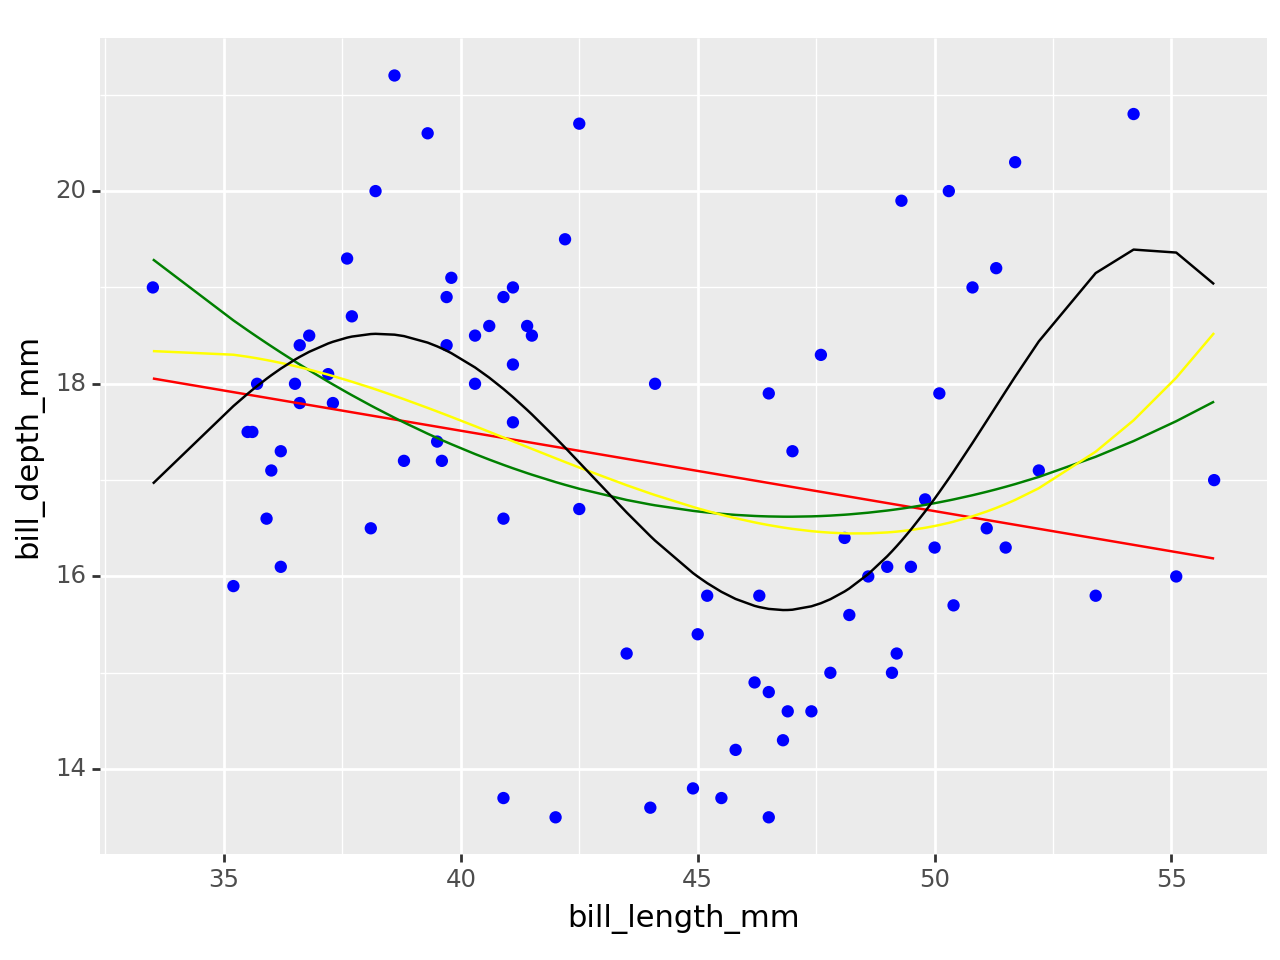

<Figure Size: (640 x 480)>

In [22]:
from plotnine import ggplot, geom_point, geom_line, aes, labs

plot = (ggplot(X_test2, aes(x='bill_length_mm'))
        + geom_point(aes(y='bill_depth_mm'), color="blue")
        + geom_line(aes(y='linear'), color = "red")
        + geom_line(aes(y='quadratic'), color = "green")
        + geom_line(aes(y='cubic'), color = "yellow")
        + geom_line(aes(y='tenth'), color = "black")
        )

plot

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Based on the plot above I would say that the first model, simple linear regression in underfitting the data as it doest account for the points well, it doesnt fit the variation on the actual points well.

The last model, the 10th polynomial model, overfits the data, we can see the line overfitting tryingto adjust for every little variation in the actual points, this model could possibly do very bad with new unseen data that doesnt follow the same patterns as exact as this sample does.

Between the last two models, I would say that they both fit a little better but  i would give the edge to the quadratic model. If you run this multiple times, the models change a bit due to different y and x train vs test, and I saw a few times where the cubic model (yellow) was also overfitting causing the same problem as the black line model. So i would pick the quadratic model (green) based on this plot.